
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  
This dataset is based on over 100k medical appointments in Brazil, and it is mostly concerned with whether patients show up for their visits.

>The dataset columns names are:
>- **Patientid:** This is use to identify the patient
>- **Apointmentid:** This is the identification of each appointment
>- **Gender:** Male or Female
>- **ScheduledDay**: This is the day the patients set up their appointmant
>- **AppointmentDay**: This is the day of the appointment 
>- **Age**: The age of the patients
>- **Neighbourhood**: This is the locations of the hospital
>- **Scholarship:** 0 or 1.  indicates whether or not the patients is enrolled in Brasilian welfare program 
>- **Hipertension:** 0 or 1. indicates wthether the patients have hipertension
>- **Diabetes**: 0 or 1. indicates whether the patients have diabetes
>- **Alcoholism:** 0 or 1. Indicates whether the patients is alcoholic
>- **Handcap**: 0 or 1. Indicates whether the patients is handicapped
>- **SMS_received:** 0 or 1. Indicates whether the patients received sms
>- **No-show**: No or Yes. Indicates whether or not the patients showed up for their scheduled appointment. No means the patient showed up for the appointment, whereas yes means they didn't.



### Questions for Analysis

>- Does having a scholarship have an impact on no-shows?
>- Do alcoholic drinking have an effect on no-shows? 

In [1]:
# importing relevant libaries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading the Dataset
df = pd.read_csv('C:\\Users\\amige\\Desktop\\ALX-T Folder\\Project 1\\No_appointment\\KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning

In [3]:
# Changing column headers to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [4]:
# Getting the statistical data about the description column
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Observation
>- The age has a negative value which needs to be removed
>- We have a wide range of ages to study, ranging from -1 to 115.
>- Most of the patients are not enrolled in the scholarship
>- The handcap colunns needs to be investigaed further cos the max value expected should be 1
>- "Scholarship," "Higher-than-normal blood pressure," "Diabetes," "Alcoholism," "Handcap," and "SMS received" are all encoded as zeros and ones.

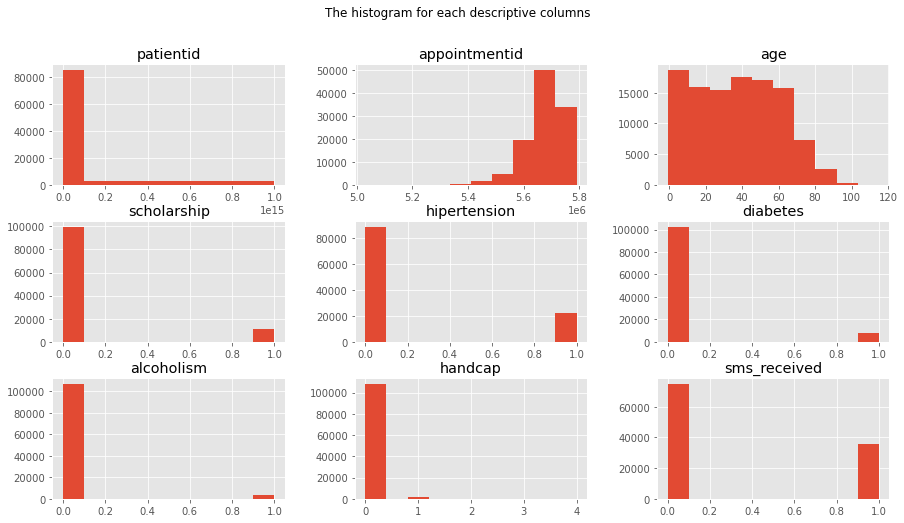

In [5]:
df.hist(figsize=(15, 8))
plt.suptitle('The histogram for each descriptive columns');

In [6]:
#checking the Unique values of the dataset
df.nunique()

patientid          61744
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

## Observation
>- Check to see whether any of the Age columns have a negativevalue.
>- We expect two distinct values from the handcap, which has five unique values.

In [7]:
# checking if the Age column have a negative value
df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
# Dropping the negative age value and confrim changes
df.drop(df.query('age < 0').index, inplace=True)
df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


In [9]:
#checking the columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110526 non-null  float64
 1   appointmentid   110526 non-null  int64  
 2   gender          110526 non-null  object 
 3   scheduledday    110526 non-null  object 
 4   appointmentday  110526 non-null  object 
 5   age             110526 non-null  int64  
 6   neighbourhood   110526 non-null  object 
 7   scholarship     110526 non-null  int64  
 8   hipertension    110526 non-null  int64  
 9   diabetes        110526 non-null  int64  
 10  alcoholism      110526 non-null  int64  
 11  handcap         110526 non-null  int64  
 12  sms_received    110526 non-null  int64  
 13  no-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Observations 
>- The dataset has no null values.
>- ScheduledDay and ApointmentDay are not Datetime data type
>- Scholarship, Hypertension, Diabeties, Alcoholism, Handicap, and SMS_received datatypes should be changed to boolean  >datatypes.
>- No-show coulumn needs to be changed to No_show
>- No-show needs to be mapped to a more particular format and changed to boolean

In [10]:
# Converting ScheduledID and AppointmentID datatypes to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [11]:
# changing Scholarship, Hypertension, Diabeties, Alcoholism, Handicap, and sms_received to boolean datatypes
cols = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

scholarship     bool
hipertension    bool
diabetes        bool
alcoholism      bool
handcap         bool
sms_received    bool
dtype: object

In [12]:
# Renaming the no-show colums
df = df.rename({'no-show': 'no_show'}, axis=1)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [13]:
# Confirm the changes in the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110526 non-null  float64            
 1   appointmentid   110526 non-null  int64              
 2   gender          110526 non-null  object             
 3   scheduledday    110526 non-null  datetime64[ns, UTC]
 4   appointmentday  110526 non-null  datetime64[ns, UTC]
 5   age             110526 non-null  int64              
 6   neighbourhood   110526 non-null  object             
 7   scholarship     110526 non-null  bool               
 8   hipertension    110526 non-null  bool               
 9   diabetes        110526 non-null  bool               
 10  alcoholism      110526 non-null  bool               
 11  handcap         110526 non-null  bool               
 12  sms_received    110526 non-null  bool               
 13  no_show       

In [14]:
# Cheking for duplicated values
df.duplicated().sum()

0

In [15]:
#Dropping columns not needed for analysis
new_df = df.drop(['neighbourhood','scheduledday', 'appointmentday','hipertension', 
                  'diabetes', 'handcap', 'sms_received', 'gender', 'age'], axis=1)


In [16]:
print(new_df.head())

      patientid  appointmentid  scholarship  alcoholism no_show
0  2.987250e+13        5642903        False       False      No
1  5.589980e+14        5642503        False       False      No
2  4.262960e+12        5642549        False       False      No
3  8.679510e+11        5642828        False       False      No
4  8.841190e+12        5642494        False       False      No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does having a scholarship have an impact on no-shows?)

In [17]:
# Creating a dataframne for patient with and without scholarship
df_scholarship = new_df.groupby(['scholarship','no_show'], as_index = False)['patientid'].count()
df_scholarship

,scholarship,no_show,patientid
0,False,No,79924
1,False,Yes,19741
2,True,No,8283
3,True,Yes,2578


In [18]:
#creating a function for plotting the bar plot
def plot_barplot(df, x, y, hue=None, title='title',ci=False, figsize=None):
    """
    This function is use to plot a barplot
    """   
    fig, ax = plt.subplots(figsize=figsize)
    
    ax = sns.barplot(x=x, y=y, hue=hue, data=df, ci=ci)
    plt.ylabel(y)
    plt.title(title)
    return plt.show()

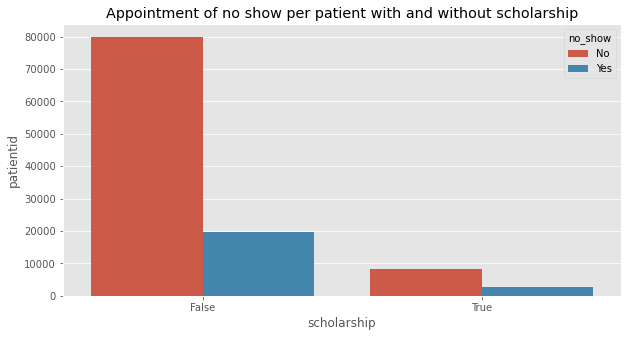

In [19]:
plot_barplot(figsize=(10,5), x='scholarship', y='patientid',hue='no_show',
             title='Appointment of no show per patient with and without scholarship',
             df=df_scholarship)

### Obervation
>1. The distribution betwwen the patient who enrolled in the scholarship program and those who did not is not evenly distributed
>2. Let us randomized the distribution for the patient who enrolled and those who did not so we can give both patients equal chance

In [20]:
# Creating a Normalized function
def normalized_df(df, groupby_col, agg_col):
    """
   This function aids in the normalization of a dataset in order to arrive at a relevant conclusion.
    """
    df_1 = new_df.groupby(groupby_col)[agg_col].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    return df_1

    

In [21]:
#calling the normalized_df function
scholarship_df = normalized_df(new_df, 'no_show', 'scholarship')
scholarship_df

,no_show,scholarship,percentage
0,No,False,90.609589
1,No,True,9.390411
2,Yes,False,88.449303
3,Yes,True,11.550697


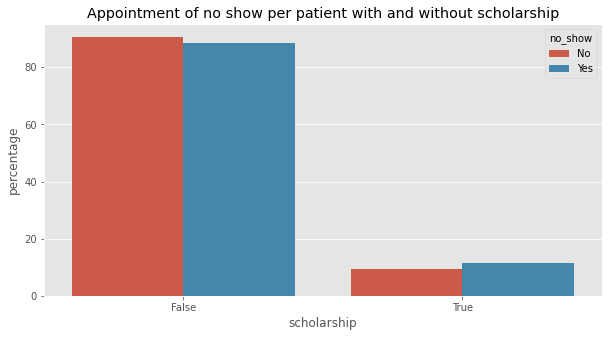

In [22]:
#plotting the normalize_df
plot_barplot(figsize=(10,5), x='scholarship', y='percentage',hue='no_show',
             title='Appointment of no show per patient with and without scholarship',
             df=scholarship_df)

### Research Question 2 (Do alcoholic drinking have an effect on no-shows? )

In [23]:
# Creating a dataframe for alcoholic patients
df_alcoholic = new_df.groupby(['alcoholism', 'no_show'], as_index=False)['patientid'].count()
df_alcoholic

,alcoholism,no_show,patientid
0,False,No,85524
1,False,Yes,21642
2,True,No,2683
3,True,Yes,677


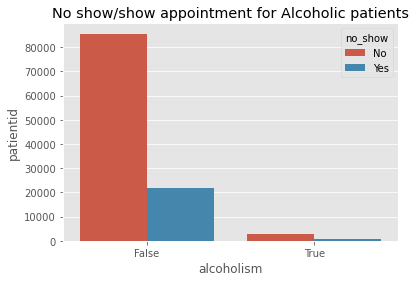

In [24]:
plot_barplot(x='alcoholism', y='patientid', hue='no_show',
             title='No show/show appointment for Alcoholic patients',df=df_alcoholic)

In [25]:
#checking rhe value counts
df['alcoholism'].value_counts()

False    107166
True       3360
Name: alcoholism, dtype: int64

### Obervation
>1. The distribution betwwen the patient who take alcohol and those who did not is not evenly distributed
>2. Let us normalized the distribution for the patient who take alcohol and who do not to give both patients equal chance

In [26]:
#calling the normalized_df function
alcohol_df = normalized_df(new_df, 'no_show', 'alcoholism')
alcohol_df

,no_show,alcoholism,percentage
0,No,False,96.958291
1,No,True,3.041709
2,Yes,False,96.966710
3,Yes,True,3.033290


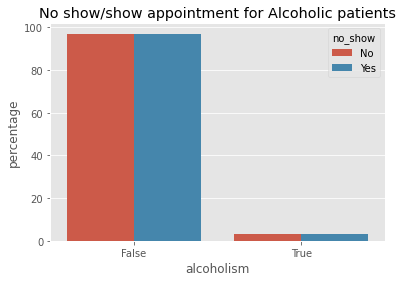

In [27]:
#plotting the normalized_df
plot_barplot(x='alcoholism', y='percentage', hue='no_show',
             title='No show/show appointment for Alcoholic patients',df=alcohol_df)

<a id='conclusions'></a>
## Conclusions

**Research Answer 1**
>- According to the findings of study question 1, there is no direct link between a patient's enrollment in a scholarship and their attendance for the appointment.

**Research Answer 2**
>- According to the findings of study question 2, there is no direct association between whether or not patients who are alcoholics attend their appointments.

**Limitation**
>- The Scholarship and Alcoholism observations were not chosen at random. In order to reach a valid conclusion, I had to randomize the observations.
>- The handcap observation should have been a number between 0 and 1, but the onservation contains 2, 3, and 4. As a result, I was unable to include the handcap observation in my research question.